# Stack Exchange Analysis

In this project, we will discuss the best topics to write about in regards to Data Science. We will be exploring the Stack Exchange site to discover what it is that people interested in Data Science find the most interesting or most challenging in regards to the topic of Data Science.

Stack Exchange is a website designed to provide a forum for people to ask questions regards various topics ranging across many areas of interest and learning, including Data Science, Mathematics, Religion, Economics, just to name a few.

When looking at the Data Science topic within Stack Exchange, we see many questions ranging multiple facets of Data Science. This includes questions like:
* How many layers should I replace in transfer learning CNN?
* What is the time complexity of learning/testing phase neural network?
* What is an optimal local sparse structure of a convolutional vision network?

## What we want to know

For this project, we will be exploring the questions that have been asked in Stack Exchange in an attempt to see what subjects are the most popular. Specifically, we will explore two main areas of the data:
* Total times a subject gets tagged to a question
* Total times a subject is part of a quesiton that is viewed

These two main areas should give us a good idea of what questions are being asked the most on Stack Exchange.

## Loading in the Data

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [103]:
df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

Now that we have created our DataFrame, we will now explore the data to fix what needs to be fixed.

## Cleaning the Data

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We can see that the column FavoriteCount has a great deal of null values, with only 1407 our of 8839 total having a value. 

We also see that the Tags column is listed as an object, which we will now explore more deeply in order to see if we can change the value types.

In [105]:
df.fillna(value={"FavoriteCount":0}, inplace=True)
df['FavoriteCount'] = df['FavoriteCount'].astype(int)

In [106]:
df['Tags'].head(5)

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

Since there are multiple tags listed in this column, each being a string, we can create a list for each question of the tags, so that we can more easily assess how often any given tag is used.

In [107]:
df['Tags'] = df['Tags'].str.replace("^<|>$", "").str.split("><")

## Analyzing the Data

In [108]:
tag_count = dict()

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1



In [109]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0:"Tag_Count"},inplace=True)
tag_count.sort_values(by="Tag_Count",ascending=False, inplace=True)
top_ten_tags = tag_count.head(10)
top_ten_tags

,Tag_Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


We have just shown the total count for each tag in our dataframe of questions. We see, after looking at the 10 most used tags:
* Machine-learning is the most tagged subject by a great margin, having more than 1000 tags than all but one other tag
* Python is second, followed by Deep-Learning and Neural-Networks

To visualize this information, we will plot the values together using a bar chart.

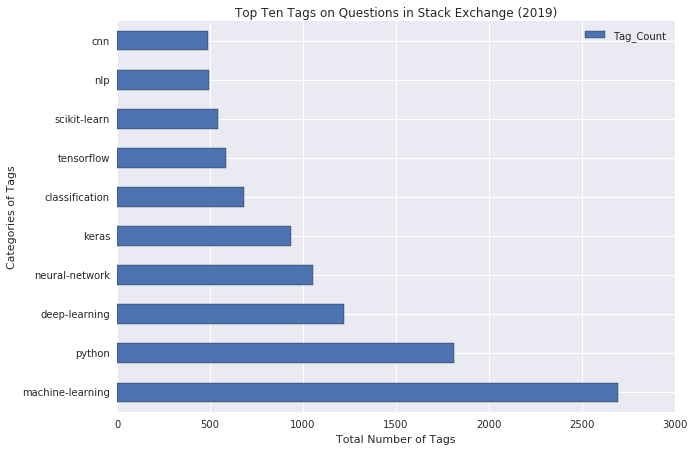

In [114]:
top_ten_tags.plot(kind='barh', figsize=(10,7))
plt.xlabel("Total Number of Tags")
plt.ylabel("Categories of Tags")
plt.title("Top Ten Tags on Questions in Stack Exchange (2019)")

The graphic above more clearly shows the number of tags compared to individual subjects. 

We can now see what categories got the most views and see if there is anything interesting to parse from that information.

In [115]:
view_count = dict()

for index, row in df.iterrows():
    for tag in row["Tags"]:
        if tag in view_count:
            view_count[tag] += row["ViewCount"]
        else:
            view_count[tag] = row["ViewCount"]

view_count = pd.DataFrame.from_dict(view_count, orient="index")

In [117]:
view_count.rename(columns={0: "View_Count"}, inplace=True)
view_count.sort_values(by="View_Count", ascending=False, inplace=True)
top_ten_views = view_count.head(10)

In [118]:
top_ten_views

,View_Count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


We see a few differences at a glance of the total views, including:
* Python is the most viewed category, even though it was the second highest tagged, and it switched places with machine learning
* Deep Learning and Neural Networks are both behind Keras in total views, despite being both tagged more often. Pandas also has more views that Neural Network

We will now visualize this data, as we did before, to get a better feel for the differences.

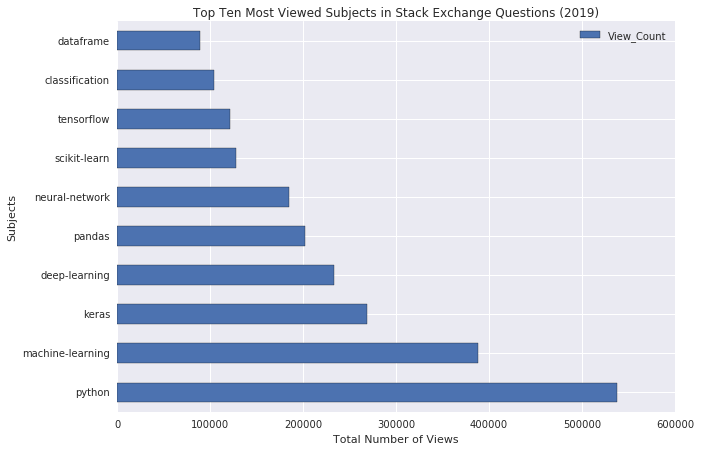

In [119]:
top_ten_views.plot(kind="barh", figsize=(10,7))
plt.xlabel('Total Number of Views')
plt.ylabel("Subjects")
plt.title("Top Ten Most Viewed Subjects in Stack Exchange Questions (2019)")

We see that the graph looks similar to the first one, with the two highest subjects in terms of views being significantly higher than the remaining subjects.

If we put the two graphs side by side, we can likely see more clearly how the views and tags stack up.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90843f0780>],
      dtype=object)

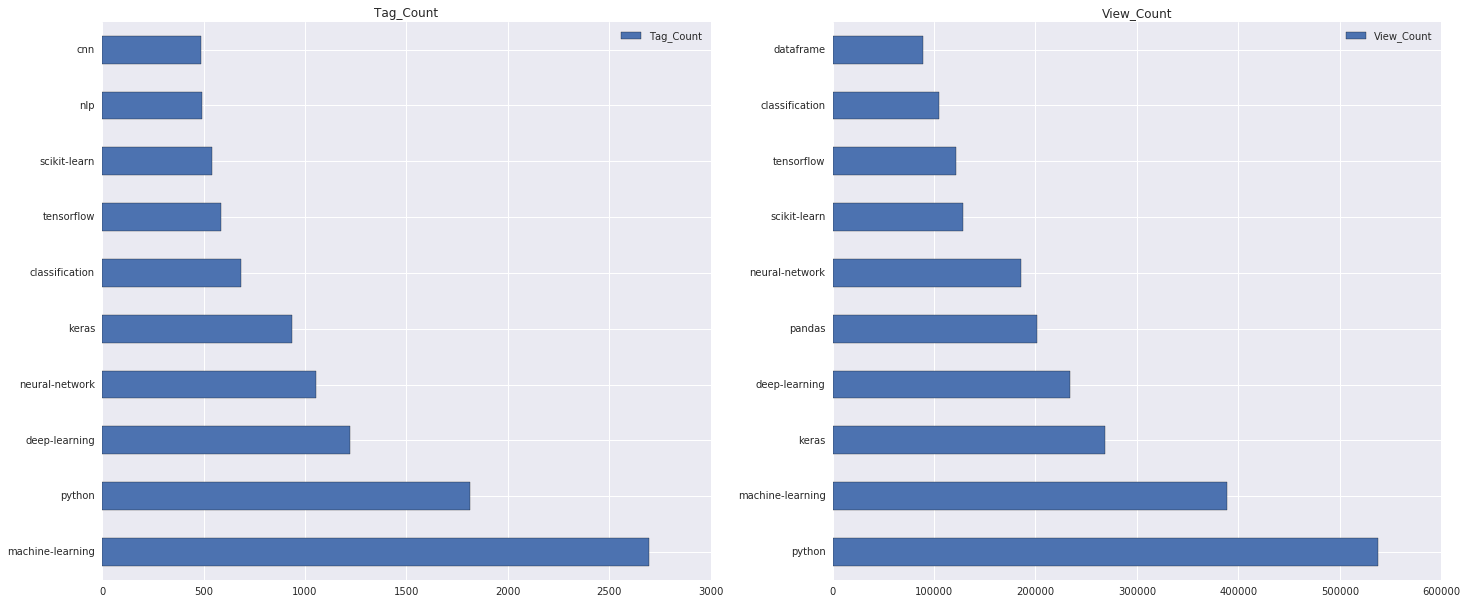

In [130]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24, 10))
top_ten_tags.plot(kind="barh", ax=axes[0], subplots=True)

top_ten_views.plot(kind="barh", ax=axes[1], subplots=True)


What we see from the two graphs above is that there is a pretty clear relationship between subjects that get tagged more often in questions and those that get more views. This makes sense, as a higher volume of tags to questions makes it more likely that a subject will be viewed. It is interesting, however, that Machine Learning is tagged in over 800 more questions than Python, but questions with python were viewed 15,000 more times.

## Results

What we also find is that subjects such as Neural Networks and Deep Learning are both tagged frequently, just like Machine Learning. It turns out that all of these subjects are related, which could account for the higher total tags for Machine Learning. It is likely that everytime one of Neural Networks or Deep Learning is tagged, Machine Learning also is tagged as well.

Similarly, Keras is related to both Python, Neural Networks, and Deep Learning, meaning that they are all likely to be tagged together frequently. Since topics with Python tags are viewed frequently, Keras likely is also tagged to many of these questions, resulting in a higher value for its views in relation to its position in tags.

What we discern is that the subjects of Neural Networks and Deep Learning seem to be very popular at the moment.

Now, we will look into whether Deep Learning is here to stay, or just popular now.

## Deep Learning, a "fad" or "here to stay"?

In [132]:
all_q = pd.read_csv('all_questions.csv',parse_dates=["CreationDate"])

In [133]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


Just as before, we will have to clean up the Tags column a bit to be able to discern the individual tags.

In [134]:
all_q['Tags'] = all_q['Tags'].str.replace("^<|>$", "").str.split("><")

We will now try to filter our tags to just the ones involving Deep Learning. This consists of ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In order to do this, we will create a split in the tags and create a new column in our dataframe.

In [137]:
dl_set = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]
def deep_learning(tags):
    for tag in tags:
        if tag in dl_set:
            return 1
        else:
            return 0


In [140]:
all_q["Deep_Learning"] = all_q["Tags"].apply(deep_learning)
all_q.head()

,Id,CreationDate,Tags,Deep_Learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Next, we will divide the info based on the quarter of each year, beginning from now and working backwards in time. We should note that the quarter for the most recent entries may not be complete, so for the sake of this, we will end our info as of 2019.

In [141]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [142]:
def quarter(time):
    year = str(time.year)
    quarter = str(((time.month-1))//3+1)
    return year+"Q"+quarter

all_q["Quarter"] = all_q["CreationDate"].apply(quarter)
all_q.head()

,Id,CreationDate,Tags,Deep_Learning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,2019Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019Q1


## Quarterly Popularity of Deep Learning

In [147]:
questions_per_quarter = all_q.groupby("Quarter").agg({"Deep_Learning":['sum','size']})
questions_per_quarter.head()

Deep_Learning     
                  sum size
Quarter                   
2014Q2              3  157
2014Q3              4  189
2014Q4              4  216
2015Q1              5  190
2015Q2              6  284

In [148]:
questions_per_quarter.columns = ['DL_Questions', 'Total_Questions']
questions_per_quarter.head()

,DL_Questions,Total_Questions
Quarter,,
2014Q2,3,157
2014Q3,4,189
2014Q4,4,216
2015Q1,5,190
2015Q2,6,284


In [150]:
questions_per_quarter['DL_percentage'] = questions_per_quarter['DL_Questions']/questions_per_quarter["Total_Questions"]
questions_per_quarter.head(10)

,DL_Questions,Total_Questions,DL_percentage
Quarter,,,
2014Q2,3,157,0.019108
2014Q3,4,189,0.021164
2014Q4,4,216,0.018519
2015Q1,5,190,0.026316
2015Q2,6,284,0.021127
2015Q3,13,311,0.041801
2015Q4,19,382,0.049738
2016Q1,38,516,0.073643
2016Q2,45,518,0.086873


In [151]:
questions_per_quarter.reset_index(inplace=True)

## Visualizing the Data

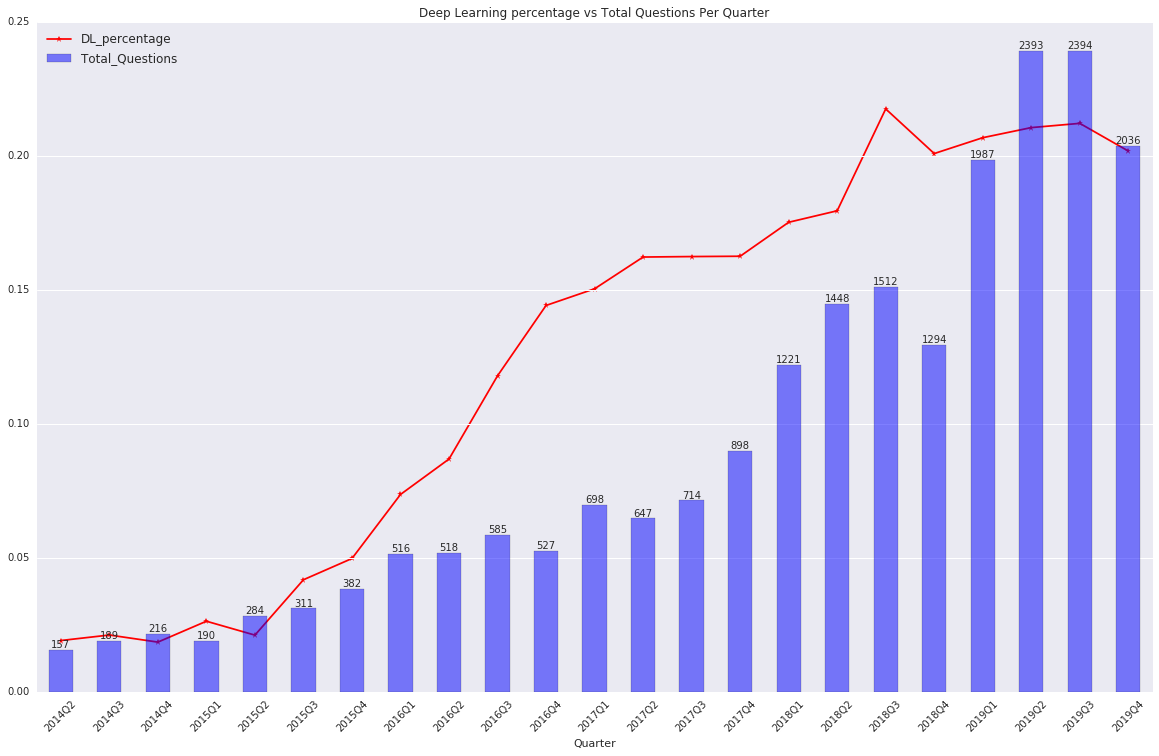

In [161]:
ax1 = questions_per_quarter.plot(x="Quarter",y="DL_percentage",kind="line", linestyle = "-", marker = "*", color = "red", figsize=(20,12))
ax2 = questions_per_quarter.plot(x="Quarter",y="Total_Questions", kind="bar",ax=ax1, secondary_y=True,alpha=0.5, rot=45, color="blue")

for idx, t in questions_per_quarter["Total_Questions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

for ax in (ax1,ax2):
    for loc in ("top", "right"):
        ax.spines[loc].set_visible(False)
        ax.tick_params(right=False, labelright = False)

plt.title("Deep Learning percentage vs Total Questions Per Quarter")



plt.show()

## Final Thoughts

The graph above shows a clear rise in popularity starting in the middle of 2015, with the percentages of questions asked rising steadily all the way through the middle of 2018, where it stayed roughly around 21% or all questions asked.

I believe that the increase in popularity has more to do with the subject being relatively new and thus more room to explore within. As of 2018, it has stayed steadily in 1 out of every 5 questions, suggesting that there is still a vast amount of work to be done in the field by those individuals that wish to research or work in Deep Learning.

I believe that Deep Learning will retain a similar level of popularity for a few more years yet, then will either decline if something more viable comes about, or increase further if big improvements occur in the field.